<a href="https://colab.research.google.com/github/Waleed-Mujahid/Fashion-mnist/blob/main/Fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comparison of KNN, Single layer NN and CNN using Fashion-mnist

In this notebook I will be using the Fashion mnist dataset to carry out a comparison between K nearest neighbours, a Single-layered neural network and a Convulotional neural network

## Importing Dependecies
We start off by import the neccesary libraries.

In [17]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

## Loading our Dataset
Next up we load our dataset using Tensorflow's dataset repository

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
# Let us take a look at the datatype of the dataset
print(type(x_train))

<class 'numpy.ndarray'>


So we have an N dimensional numpy array.

---

Now lets look at the shape of Train and Test datasets

In [4]:
print(x_train.shape, x_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [5]:
img_size = x_train.shape[1]

We need a 2d numpy array to apply K nearest Neighbours classifier so we reshape our dataset.

In [6]:
x_train = x_train.reshape((x_train.shape[0],-1))
x_test = x_test.reshape((x_test.shape[0],-1))

In [7]:
print(x_train.shape, x_test.shape)

(60000, 784) (10000, 784)


In [8]:
print(y_train.shape)

(60000,)


**Point to be noted:** Our labels are not one hot encoded


---
 We get the class labels from the meta-deta about the dataset


In [16]:
class_labels = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneakers','Bag','Ankle boot']

## K Nearest Neighbour Model
### Pre-processing our Data
First we normalize our data using Sklearn pre-processing

In [9]:
from sklearn.preprocessing import Normalizer
norm = Normalizer()

x_train_norm = norm.fit_transform(x_train)
x_test_norm = norm.transform(x_test)

**Note:** We fit the normalizer on only the train data so we do not face any overfitting. Transform is done on both as it normalizes the data while fit calculates average and standard deviation.

---

Next we use Sklearn's K nearest neighbours to classify the data

### Training the Model
We use Sklearn's build in K neighbours Classifier to train the data.

In [10]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(x_train_norm,y_train)

KNeighborsClassifier()

### Evalutaing the Model
Next we make use of Sklearn.metrics to check how the K neighbours classifier is performing

In [11]:
from sklearn.metrics import accuracy_score
y_pred = classifier.predict(x_test_norm)
KNN_accuracy = accuracy_score(y_test,y_pred)

In [12]:
print(f'So the accuracy for N nearest neighbours is {KNN_accuracy*100} ')

So the accuracy for N nearest neighbours is 85.78 


In [13]:
from sklearn.metrics import f1_score, precision_score, recall_score
KNN_f1_score = f1_score(y_test,y_pred, average = 'weighted')
KNN_precision_score = precision_score(y_test,y_pred, average = 'weighted')
KNN_recall_score = f1_score(y_test,y_pred, average = 'weighted')

print(f'F1 score = {KNN_f1_score*100:.02f} \nPrecision = {KNN_precision_score*100:.02f} \nRecall = {KNN_recall_score*100:.02f}')

F1 score = 85.60 
Precision = 86.23 
Recall = 85.60


### Plotting confusion Matrix

In [25]:
params = {'figure.figsize': (16, 9)}
plt.rcParams.update(params)

In [21]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test,y_pred, normalize='true')

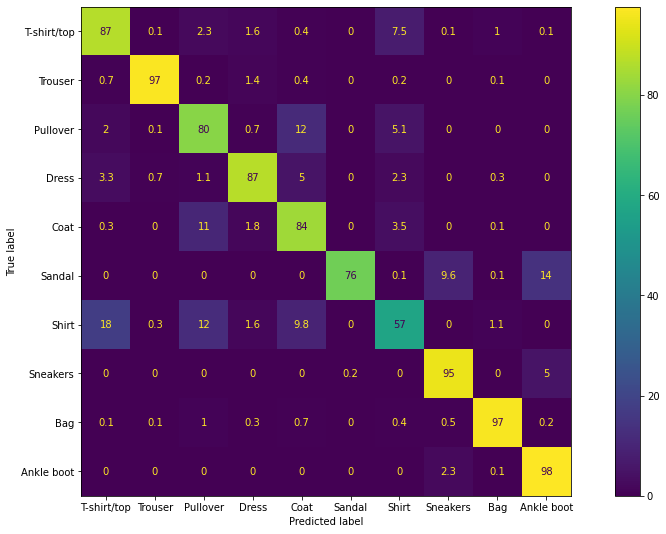

In [27]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(cm1*100, display_labels=class_labels)
disp.plot()

**Note:**
The confusion matrix has a lot of information. One particular thing to be noted is Shirt was correctly predicted only 57% times. It is due to the fact that Shirt is quite similar to a T-shirp/top , pullover and coat as well. Shirts are misidentified as these items which leads to a lower accuracy for shirt. We will see in the CNN model this accuracy will increase.

## Importing helper functions
Next up I import some helper functions to avoid rewriting code.

In [28]:
!wget https://raw.githubusercontent.com/Waleed-Mujahid/Coding/master/colabUtils.py

--2022-07-18 10:25:51--  https://raw.githubusercontent.com/Waleed-Mujahid/Coding/master/colabUtils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1625 (1.6K) [text/plain]
Saving to: ‘colabUtils.py’

colabUtils.py       100%[===================>]   1.59K  --.-KB/s    in 0s      

2022-07-18 10:25:51 (35.3 MB/s) - ‘colabUtils.py’ saved [1625/1625]



In [29]:
from colabUtils import *

## Single Layer Neural Network
Now we will create a neural network with only one hidden layer and fit our data to it.

### Building our Neural Network



In [30]:
model = Sequential()
model.add(Dense(512, input_shape = x_train_norm[0].shape , activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


### Fitting the model on Data

In [31]:
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
metrics=['accuracy'])

In [32]:
history = model.fit(x_train_norm, y_train, validation_split=0.1, epochs = 20)

Epoch 1/20
1688/1688 [==============================] - 7s 3ms/step - loss: 0.5402 - accuracy: 0.8089 - val_loss: 0.4069 - val_accuracy: 0.8535
Epoch 2/20
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3914 - accuracy: 0.8595 - val_loss: 0.3719 - val_accuracy: 0.8603
Epoch 3/20
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3512 - accuracy: 0.8713 - val_loss: 0.3534 - val_accuracy: 0.8685
Epoch 4/20
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3218 - accuracy: 0.8824 - val_loss: 0.3279 - val_accuracy: 0.8800
Epoch 5/20
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3008 - accuracy: 0.8903 - val_loss: 0.3250 - val_accuracy: 0.8818
Epoch 6/20
1688/1688 [==============================] - 4s 2ms/step - loss: 0.2841 - accuracy: 0.8949 - val_loss: 0.3174 - val_accuracy: 0.8815
Epoch 7/20
1688/1688 [==============================] - 4s 2ms/step - loss: 0.2697 - accuracy: 0.9012 - val_loss: 0.3154 - val_accuracy:

now lets take a look at home our model trained

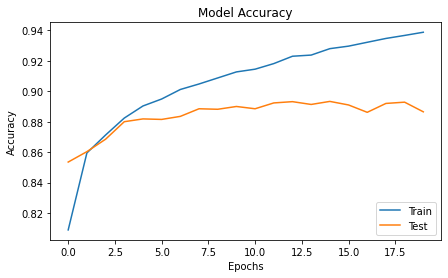

In [33]:
plotAccuracy(history,True)

### Evaluating the Model

In [34]:
loss, accuracy_nn = model.evaluate(x_test_norm,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3514 - accuracy: 0.8848


In [35]:
print(f"The accuracy received on Test data is: {accuracy_nn*100:.2f}%")

The accuracy received on Test data is: 88.48%


In [36]:
from sklearn.metrics import f1_score, precision_score, recall_score

y_pred2 = model.predict(x_test_norm)
y_pred2 = np.argmax(y_pred2, axis=1)
NN_f1_score = f1_score(y_test,y_pred2, average = 'weighted')
NN_precision_score = precision_score(y_test,y_pred2, average = 'weighted')
NN_recall_score = f1_score(y_test,y_pred2, average = 'weighted')

print(f'F1 score = {NN_f1_score*100:.02f} \nPrecision = {NN_precision_score*100:.02f} \nRecall = {NN_recall_score*100:.02f}')

F1 score = 88.24 
Precision = 88.73 
Recall = 88.24


### Plotting a Confusion Matrix

In [37]:
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(y_test,y_pred2, normalize='true')

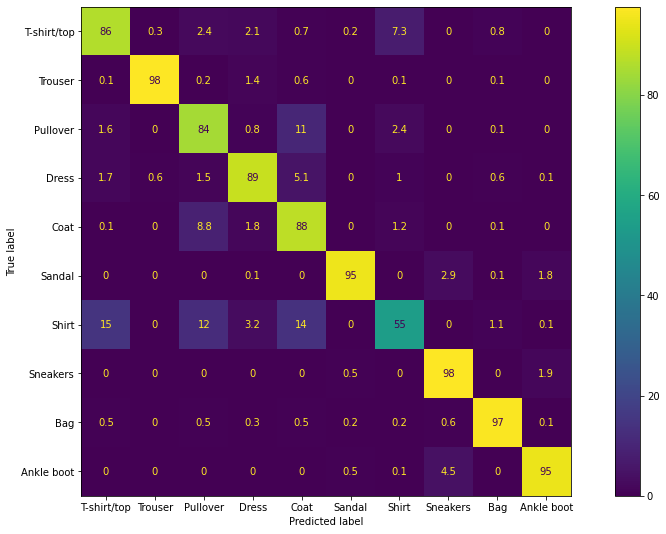

In [38]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(cm2*100, display_labels=class_labels)
disp.plot()

Here we can note that the accuracy for shirt is still poor.

## Convulotional Neural Network

First we resize our data bach into 2d images as it is a requirement for Conv layers.

In [39]:
x_train_norm = x_train_norm.reshape(x_train_norm.shape[0],img_size,img_size)
x_test_norm = x_test_norm.reshape(x_test_norm.shape[0],img_size,img_size)

In [40]:
print(x_train_norm.shape,x_test_norm.shape)
print(y_train.shape)

(60000, 28, 28) (10000, 28, 28)
(60000,)


### Building our CNN

In [41]:
model2 = Sequential()
model2.add(Conv2D(32, (5, 5), padding = 'same' , input_shape=(img_size,img_size,1)))  # Input size of all images must be standard for model
model2.add(keras.layers.Activation('relu'))
model2.add(Conv2D(32, (5, 5), padding = 'same'))
model2.add(keras.layers.Activation('relu'))
model2.add(MaxPooling2D(strides=2))
model2.add(Dropout(0.4))

model2.add(Conv2D(64, (5, 5) , padding = 'same'))
model2.add(keras.layers.Activation('relu'))
model2.add(Conv2D(64, (5, 5) , padding = 'same'))
model2.add(keras.layers.Activation('relu'))
model2.add(MaxPooling2D(strides=2))
model2.add(Dropout(0.4))

model2.add(Conv2D(128, (3, 3) , padding = 'same'))
model2.add(keras.layers.Activation('relu'))
model2.add(Conv2D(128, (3, 3) , padding = 'same'))
model2.add(keras.layers.Activation('relu'))
model2.add(MaxPooling2D(strides=2))
model2.add(Dropout(0.4))


model2.add(Flatten())
model2.add(Dense(10, activation='softmax')) 

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 activation (Activation)     (None, 28, 28, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        25632     
                                                                 
 activation_1 (Activation)   (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                      

### Fitting our CNN

In [42]:
model2.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
metrics=['accuracy'])

In [43]:
history2 = model2.fit(x_train_norm, y_train, validation_split=0.1, epochs = 20)

Epoch 1/20
1688/1688 [==============================] - 19s 6ms/step - loss: 0.5670 - accuracy: 0.7884 - val_loss: 0.3389 - val_accuracy: 0.8740
Epoch 2/20
1688/1688 [==============================] - 9s 6ms/step - loss: 0.3632 - accuracy: 0.8654 - val_loss: 0.3160 - val_accuracy: 0.8870
Epoch 3/20
1688/1688 [==============================] - 10s 6ms/step - loss: 0.3200 - accuracy: 0.8809 - val_loss: 0.2713 - val_accuracy: 0.8987
Epoch 4/20
1688/1688 [==============================] - 10s 6ms/step - loss: 0.2963 - accuracy: 0.8900 - val_loss: 0.2568 - val_accuracy: 0.9052
Epoch 5/20
1688/1688 [==============================] - 10s 6ms/step - loss: 0.2787 - accuracy: 0.8975 - val_loss: 0.2450 - val_accuracy: 0.9138
Epoch 6/20
1688/1688 [==============================] - 10s 6ms/step - loss: 0.2697 - accuracy: 0.8989 - val_loss: 0.2386 - val_accuracy: 0.9137
Epoch 7/20
1688/1688 [==============================] - 9s 6ms/step - loss: 0.2557 - accuracy: 0.9046 - val_loss: 0.2323 - val_accu

Now lets take a look at how our model trained.

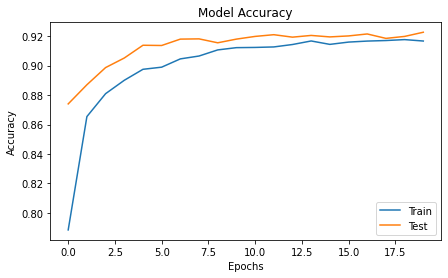

In [44]:
plotAccuracy(history2,True)

### Evaluating our CNN

In [45]:
loss_cnn, accuracy_cnn = model2.evaluate(x_test_norm,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.2241 - accuracy: 0.9202


In [46]:
print(f"The accuracy received on Test data is: {accuracy_cnn*100:.2f}%")

The accuracy received on Test data is: 92.02%


In [47]:
from sklearn.metrics import f1_score, precision_score, recall_score

y_pred3 = model2.predict(x_test_norm)
y_pred3 = np.argmax(y_pred3, axis=1)
CNN_f1_score = f1_score(y_test,y_pred3, average = 'weighted')
CNN_precision_score = precision_score(y_test,y_pred3, average = 'weighted')
CNN_recall_score = f1_score(y_test,y_pred3, average = 'weighted')

print(f'F1 score = {CNN_f1_score*100:.02f} \nPrecision = {CNN_precision_score*100:.02f} \nRecall = {CNN_recall_score*100:.02f}')

F1 score = 92.00 
Precision = 92.05 
Recall = 92.00


Plotting a Confusion Matrix

In [48]:
from sklearn.metrics import confusion_matrix
cm3 = confusion_matrix(y_test,y_pred3, normalize='true')

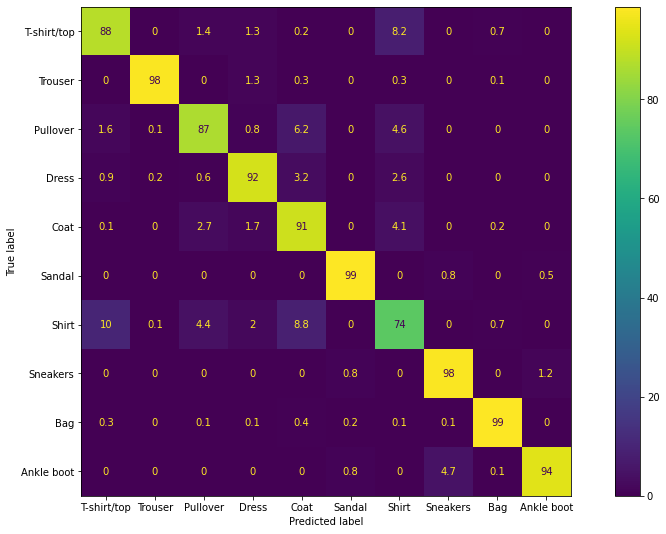

In [49]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(cm3*100, display_labels=class_labels)
disp.plot()

Here we can note that the accuracy of shirt has increase from 57 to 74 by using a convolutional neural network. This is due to the fact that convulotional neural networks are great for finding patterns in images. This is also why we got highest accuracy and F1 score for the CNN model.

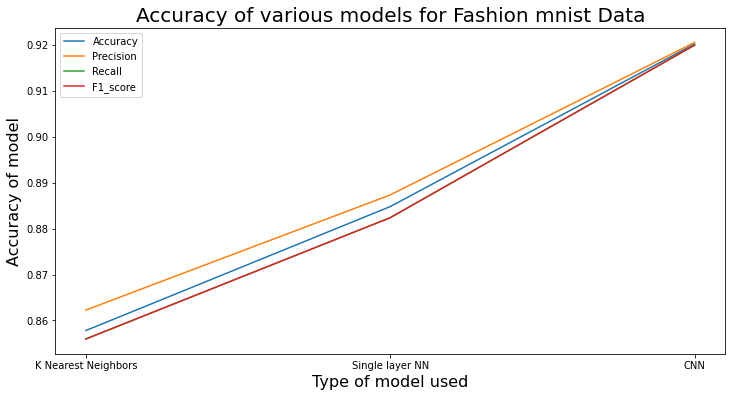

In [67]:
accuracy = [KNN_accuracy,accuracy_nn,accuracy_cnn]
precision = [KNN_precision_score,NN_precision_score,CNN_precision_score]
recall = [KNN_recall_score,NN_recall_score,CNN_recall_score]
f1_score = [KNN_f1_score,NN_f1_score,CNN_f1_score]
x = ['K Nearest Neighbors',"Single layer NN", "CNN"]
from pylab import rcParams
rcParams['figure.figsize'] = 12, 6
fig, ax = plt.subplots()
ax.plot(x,accuracy)
ax.plot(x,precision)
ax.plot(x,recall)
ax.plot(x,f1_score)
ax.set_xticks(x)
plt.xlabel("Type of model used", fontsize = 16)
plt.ylabel("Accuracy of model", fontsize = 16)
plt.legend(['Accuracy', 'Precision', 'Recall', 'F1_score'], loc='upper left')
plt.title("Accuracy of various models for Fashion mnist Data", fontsize = 20)
plt.show()

Above graph demonstrates how using a Neural network is  better for image classification and how adding Convulotional layers to our neural network can boost our model's accuracy.